# HW3 

In [1]:
import pandas as pd
import numpy as np

def absolute_loss(w0, w1, x, y):
    return np.abs(w0 + w1*x - y)

def subgradient_w0(w0, w1, x, y):
    return np.sign(w0 + w1*x - y)

def subgradient_w1(w0, w1, x, y):
    return x * np.sign(w0 + w1*x - y)

def subgradient_descent(x, y, learning_rate=0.01, max_iter=1000, tolerance=1e-4):
    # init w0 and w1 with random values
    np.random.seed(0)
    w0 = np.random.randn()
    w1 = np.random.randn()
    
    for i in range(max_iter):
        w0_prev, w1_prev = w0, w1
        
        grad_w0 = np.mean(subgradient_w0(w0, w1, x, y))
        grad_w1 = np.mean(subgradient_w1(w0, w1, x, y))

        # update
        w0 -= learning_rate * grad_w0
        w1 -= learning_rate * grad_w1
        
        # check if meets minima
        if abs(w0 - w0_prev) < tolerance and abs(w1 - w1_prev) < tolerance:
            break
    
    return w0, w1


df = pd.read_csv('data.csv', header=None)
df = df.rename(columns={0: 'x', 1: 'y'})

x = df['x'].values
y = df['y'].values

w0, w1 = subgradient_descent(x, y)

print("w0:", w0)
print("w1:", w1)

w0: 2.6920523459676007
w1: 3.8265272083671187


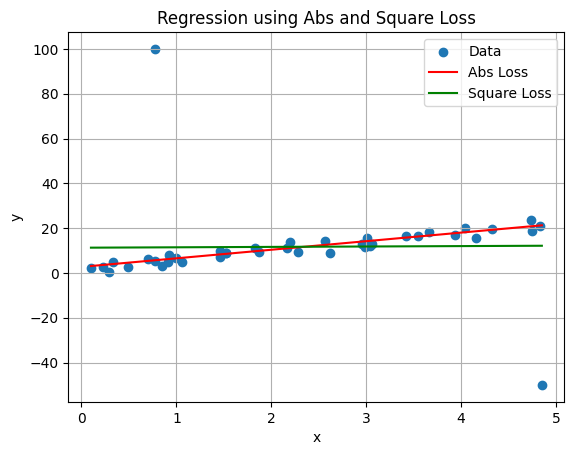

In [2]:
import matplotlib.pyplot as plt

hw2_w0 = 11.259265157892216
hw2_w1 = 0.17962947922305333

plt.scatter(x, y, label='Data')

# plotting 
x_values = np.linspace(min(x), max(x), 100)
y_values = w0 + w1 * x_values
y_values_hw2 = hw2_w0 + hw2_w1 * x_values
plt.plot(x_values, y_values, color='red', label='Abs Loss')
plt.plot(x_values, y_values_hw2, color='green', label='Square Loss')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression using Abs and Square Loss')
plt.legend()
plt.grid(True)
plt.show()